<a href="https://www.kaggle.com/code/riddhishwars/house-price-prediction?scriptVersionId=129582106" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**HOUSE PRICE PREDICTION**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**IMPORTING DATASET**

Importing csv file

In [2]:
df=pd.read_csv("/kaggle/input/others/House_Price.csv")

In [3]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop', 'airport',
       'n_hos_beds', 'n_hot_rooms', 'waterbody', 'rainfall', 'bus_ter',
       'parks'],
      dtype='object')

In [4]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


**ANALYSING THE DATASET**

In [5]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,498.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.476683,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.634500,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.999000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.088000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

**Inference from the dataset**

1.   In crime_rate, 75% of values lie below 3.677 where the maximum value is 88.97 where the there is an abnormal distribution (reason due to any Outliers).
2.   Same as for the n_hot_rooms column
3.   Missing values in n_hos_beds
4.   Abnormal distribution in rainfall



*** EDD (EXTENDED DATA DICTIONARY) ***

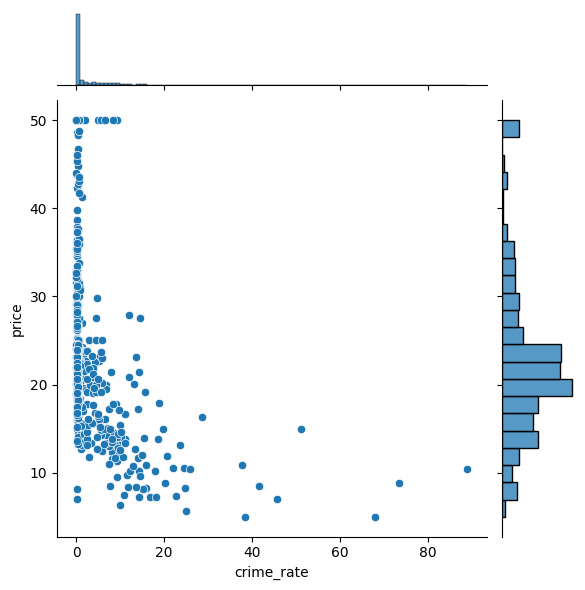

In [7]:
sns.jointplot(data=df,x="crime_rate",y="price")

From the above plot, the crime rate is a polynomial relationship with target (price) variable

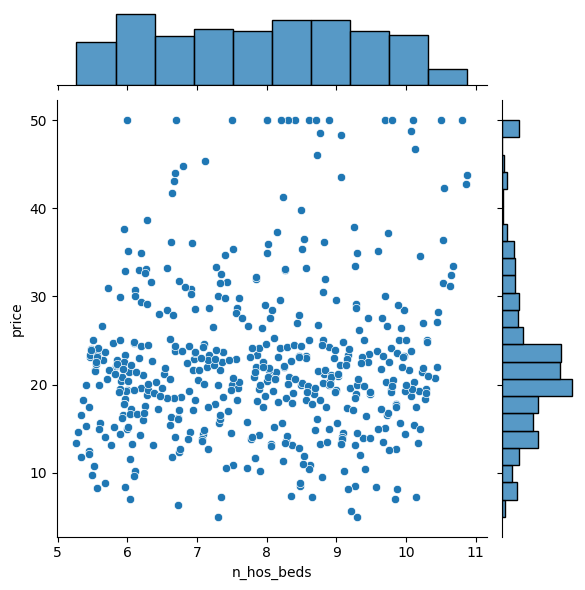

In [8]:
sns.jointplot(data=df,x="n_hos_beds",y="price")

Nearly, the n_hos_beds has abnormal distribution (scattered everywhere), couldnt able to analyse a distribution for it

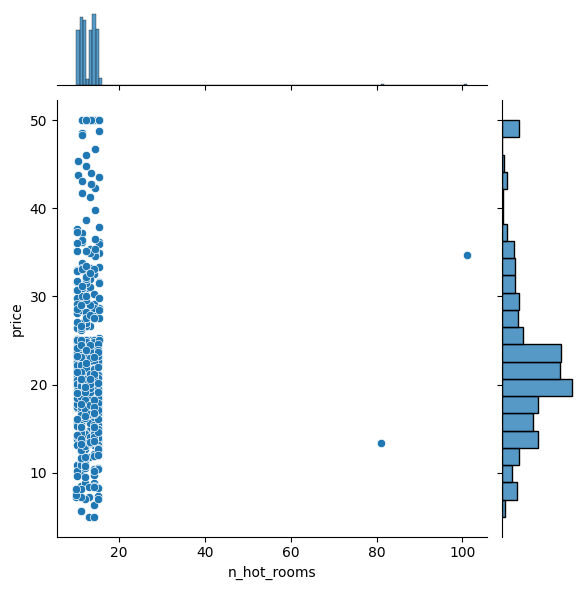

In [9]:
sns.jointplot(data=df,x="n_hot_rooms",y="price")

From above plot, merely two outliers found.

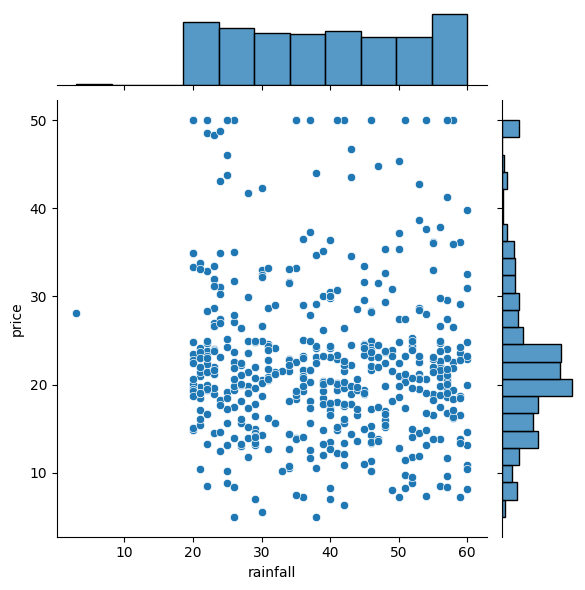

In [10]:
sns.jointplot(data=df,x="rainfall",y="price")

Nearly, the rainfall has abnormal distribution (scattered everywhere), couldnt able to analyse a distribution for it

In [11]:
df.shape

(506, 19)

<AxesSubplot: >

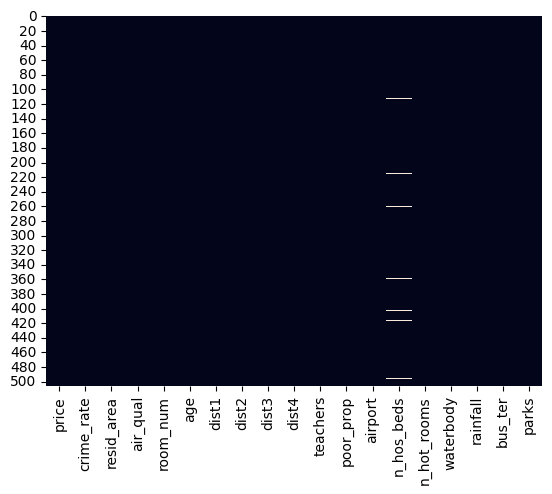

In [12]:
sns.heatmap(df.isnull(), cbar=False)

Here, n_hot_rooms could able to internpret that it has outliers

**Visualising Categrical Variable**

<AxesSubplot: xlabel='airport', ylabel='count'>

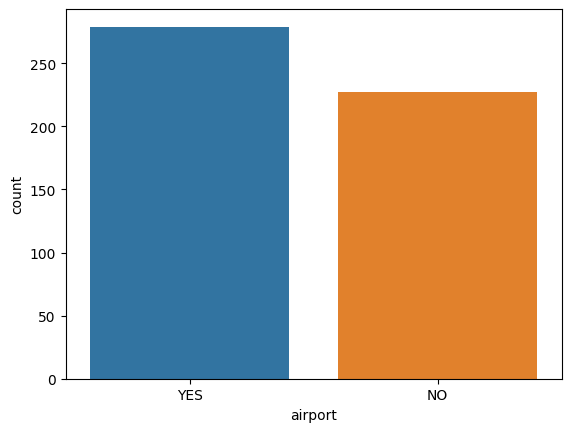

In [13]:
sns.countplot(data=df,x="airport")

<AxesSubplot: xlabel='waterbody', ylabel='count'>

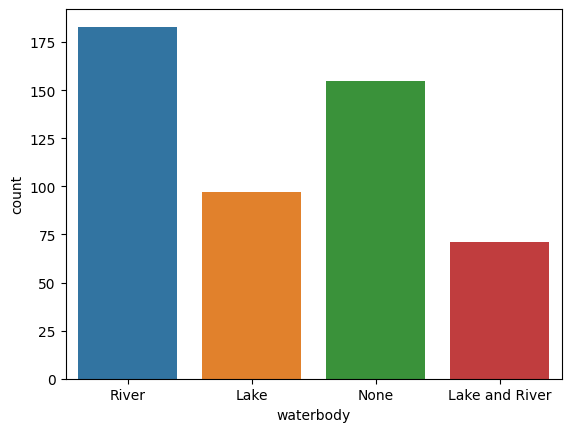

In [14]:
sns.countplot(data=df,x="waterbody")

<AxesSubplot: xlabel='bus_ter', ylabel='count'>

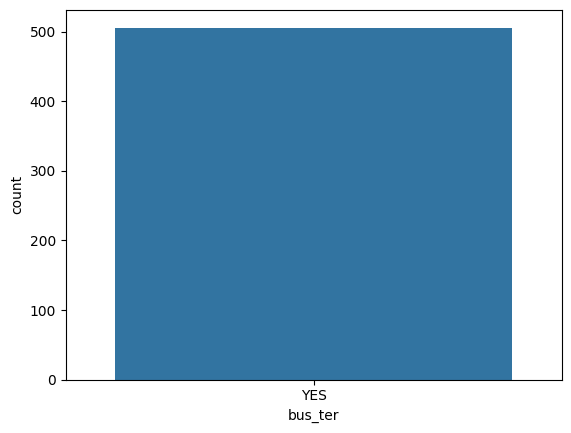

In [15]:
sns.countplot(data=df,x="bus_ter")

So, from the above plot ,it has been concluded as it has a constant value **YES**

**Creating Dummy Varaible for the Categorical Varaible**

In [16]:
df=pd.get_dummies(df)

In [17]:
df.columns

Index(['price', 'crime_rate', 'resid_area', 'air_qual', 'room_num', 'age',
       'dist1', 'dist2', 'dist3', 'dist4', 'teachers', 'poor_prop',
       'n_hos_beds', 'n_hot_rooms', 'rainfall', 'parks', 'airport_NO',
       'airport_YES', 'waterbody_Lake', 'waterbody_Lake and River',
       'waterbody_None', 'waterbody_River', 'bus_ter_YES'],
      dtype='object')

From the above Columns, dropping bus_ter_YES column

In [18]:
del df["bus_ter_YES"]

Dropping rainfall and n_hos_beds since it is having scatter distribution

In [19]:
del df["rainfall"]
del df["n_hos_beds"]

Normalizing those crime_rate column lograthimically since it has polynomial distribution

In [20]:
df["crime_rate"]=np.log(1+df.crime_rate)

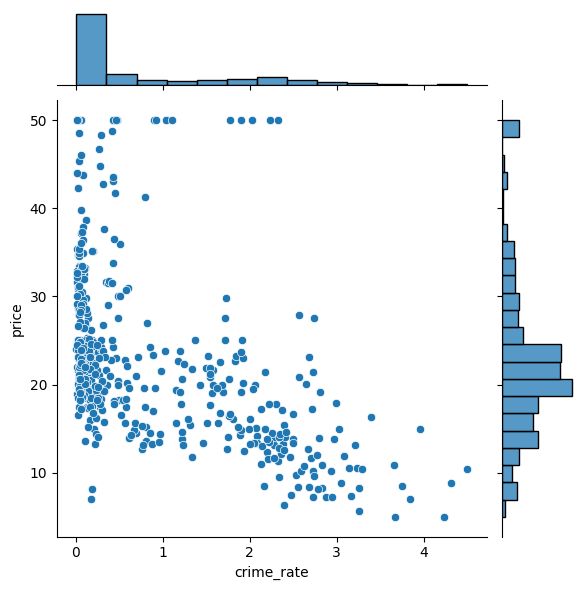

In [21]:
sns.jointplot(data=df,x="crime_rate",y="price")

**INFERENCE :** Now, the plot is shwing a kind of linear relationship

**OUTLIER TREATEMENT FOR THE n_hot_rooms BY CAPPING AND FLOORING METHOD**

In [22]:
lower_threshold=np.percentile(df["n_hot_rooms"],[1])[0]
higher_threshold=np.percentile(df["n_hot_rooms"],[99])[0]

In [23]:
df.n_hot_rooms[df.n_hot_rooms<0.3*lower_threshold]=0.3*lower_threshold
df.n_hot_rooms[df.n_hot_rooms>3*higher_threshold]=3*higher_threshold

/tmp/ipykernel_20/3599015148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[df.n_hot_rooms<0.3*lower_threshold]=0.3*lower_threshold
/tmp/ipykernel_20/3599015148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.n_hot_rooms[df.n_hot_rooms>3*higher_threshold]=3*higher_threshold


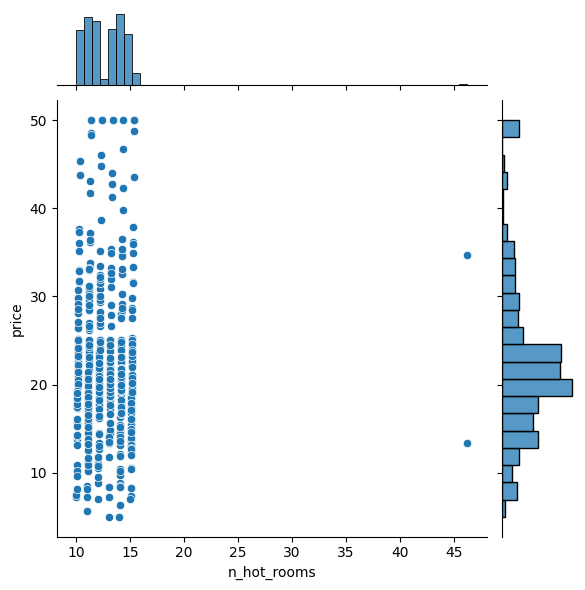

In [24]:
sns.jointplot(data=df,x="n_hot_rooms",y="price")

In [25]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,0.813418,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,12.864050,0.054454,0.448617,0.551383,0.191700,0.140316,0.306324,0.361660
std,9.182176,1.022731,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,2.688778,0.010632,0.497845,0.497845,0.394028,0.347659,0.461422,0.480957
min,5.000000,0.006300,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,10.057600,0.033292,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.025000,0.078853,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,11.189800,0.046464,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.200000,0.228336,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,12.720000,0.053507,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,25.000000,1.542674,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,14.170800,0.061397,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,50.000000,4.499545,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,46.198560,0.086711,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now,all columns has been normalized without any outliers

**TREATING MISSING VALUES BY MEAN**

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   price                     506 non-null    float64
 1   crime_rate                506 non-null    float64
 2   resid_area                506 non-null    float64
 3   air_qual                  506 non-null    float64
 4   room_num                  506 non-null    float64
 5   age                       506 non-null    float64
 6   dist1                     506 non-null    float64
 7   dist2                     506 non-null    float64
 8   dist3                     506 non-null    float64
 9   dist4                     506 non-null    float64
 10  teachers                  506 non-null    float64
 11  poor_prop                 506 non-null    float64
 12  n_hot_rooms               506 non-null    float64
 13  parks                     506 non-null    float64
 14  airport_NO

In [27]:
df=df.fillna(df.mean())

In [28]:
df.crime_rate=np.log(1+df.crime_rate)

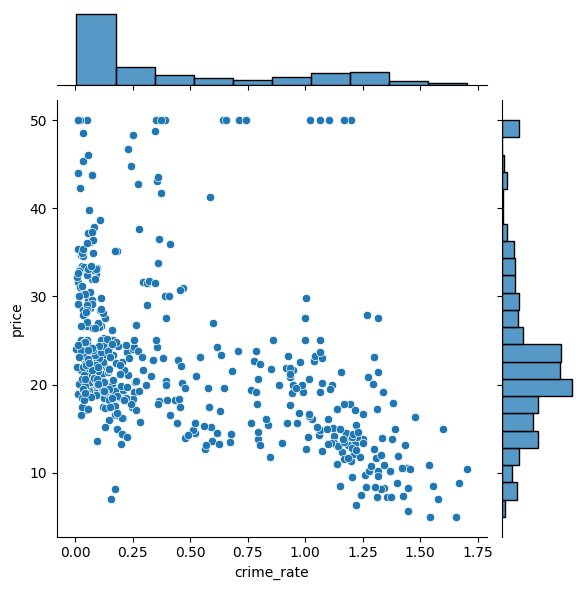

In [29]:
sns.jointplot(data=df,x="crime_rate",y="price")

Taking Avergae of dist1,dist2,dist3 and dist4 as all are interpreting the same so Average take as a new Column

In [30]:
df['Average'] = df[['dist1', 'dist2', 'dist3', 'dist4']].mean(axis=1)

In [31]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,n_hot_rooms,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,Average
0,24.0,0.006280,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,4.98,11.19200,0.049347,0,1,0,0,0,1,4.0875
1,21.6,0.026587,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,9.14,12.17280,0.046146,1,0,1,0,0,0,4.9675
2,34.7,0.026568,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,4.03,46.19856,0.045764,1,0,0,0,1,0,4.9675
3,33.4,0.031360,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,2.94,11.26720,0.047151,0,1,1,0,0,0,6.0650
4,36.2,0.064636,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,5.33,11.28960,0.039474,1,0,1,0,0,0,6.0625


<AxesSubplot: >

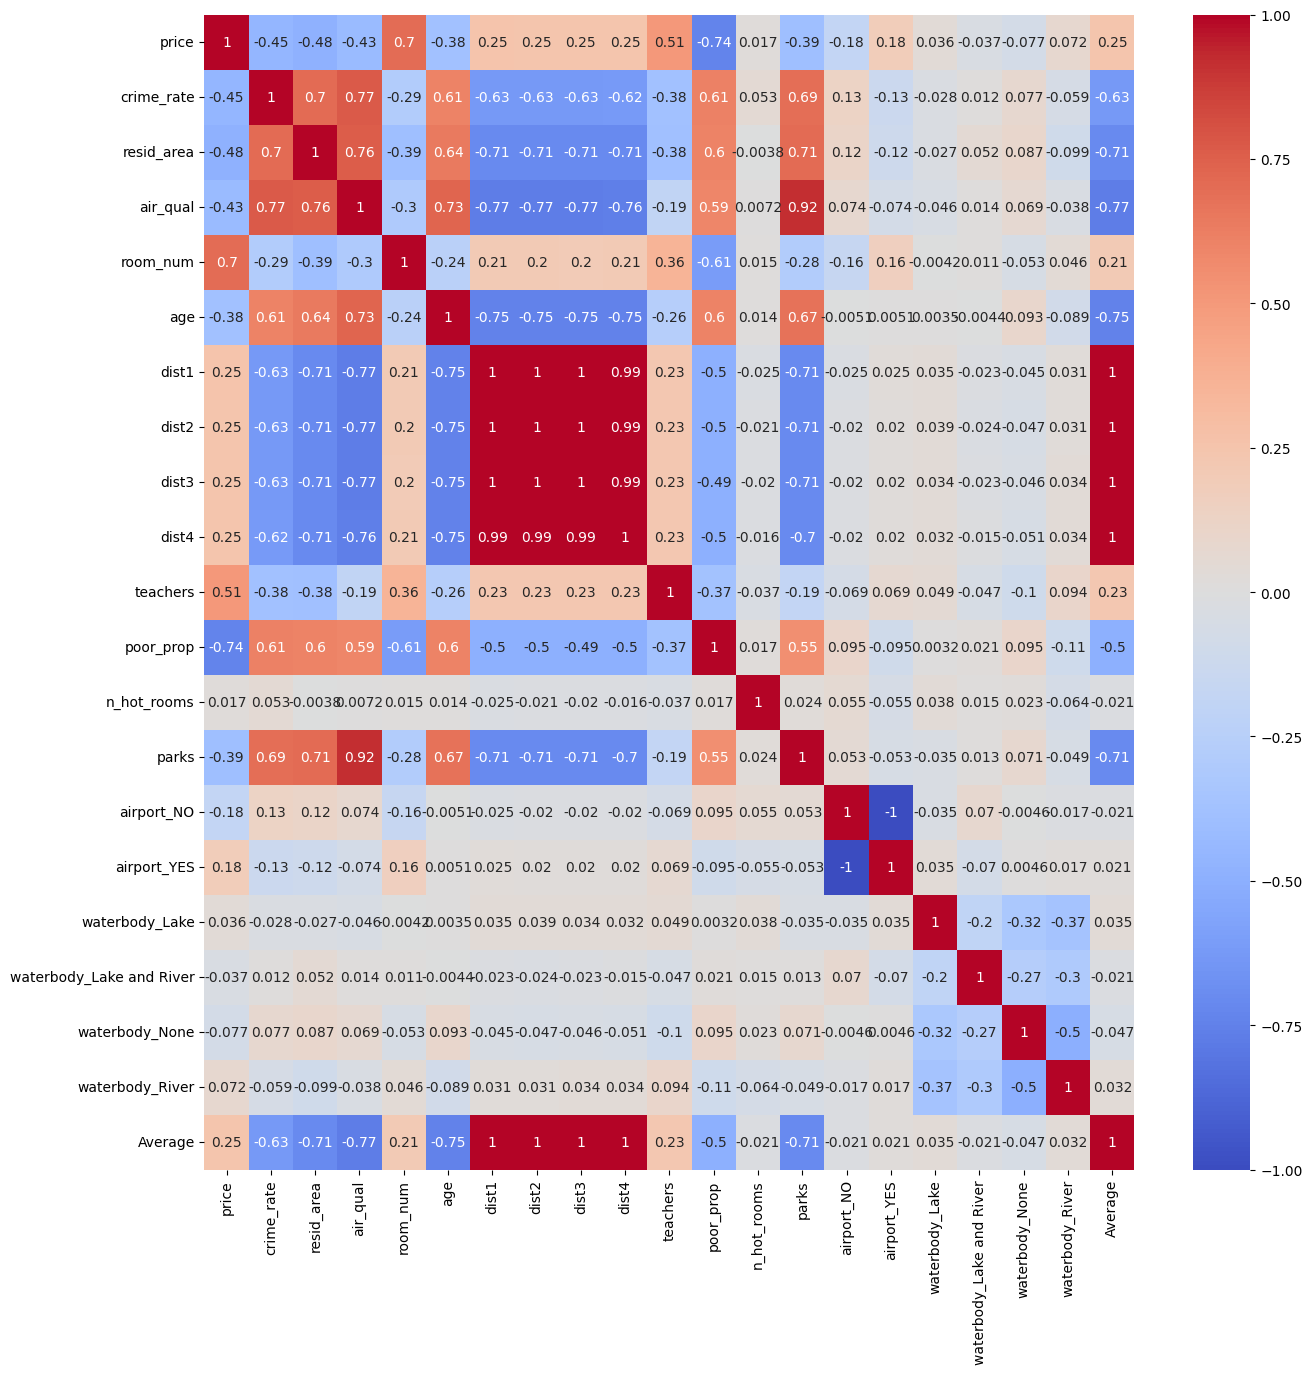

In [32]:
plt.subplots(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

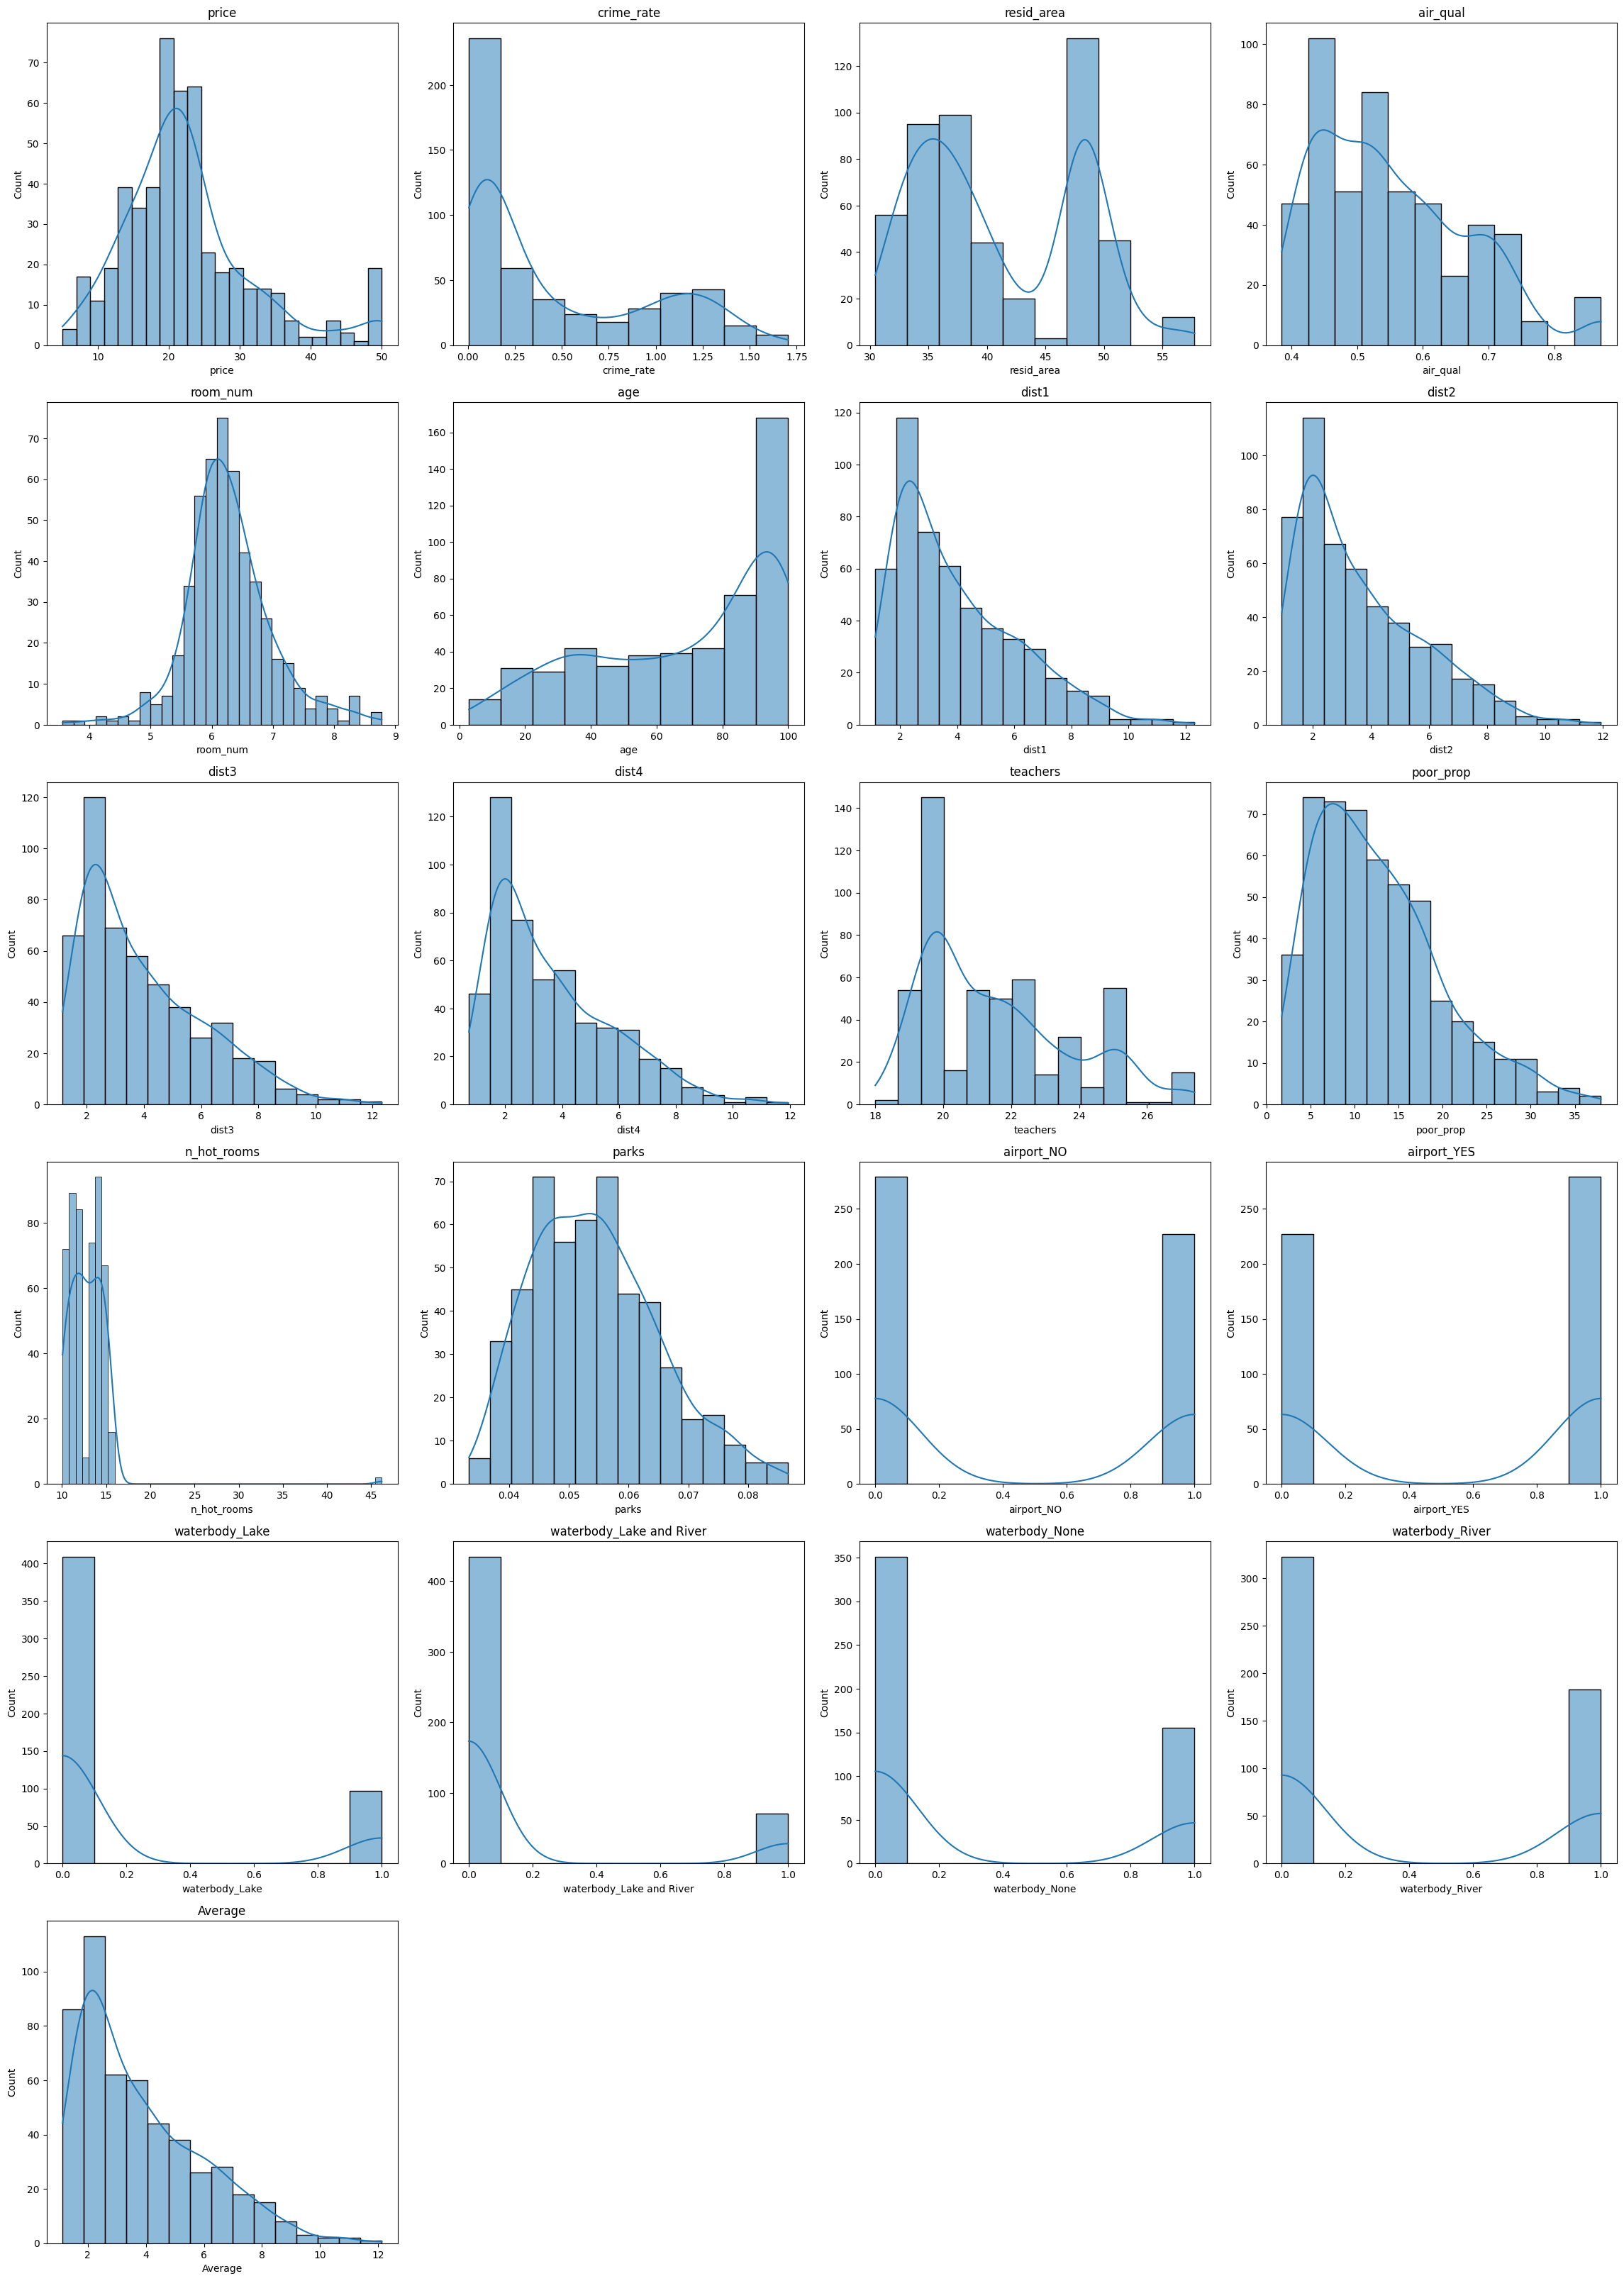

In [33]:
import scipy.stats as stats
plt.figure(figsize=(23,80))
lists=df.columns
j=0
for i in list(enumerate(df.columns)):
#     print(i[1])
    plt.subplot(15, 4, i[0]+1)
    sns.histplot(data = df[i[1]], kde=True)  # Histogram with KDE line
    plt.title(lists[j])
    j=j+1

plt.tight_layout()  
plt.show() 

**TRAINING AND TESTING THE MODEL**

In [34]:
import statsmodels.api as sn

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
x_multi=df.drop(["price"],axis=1)

In [37]:
x_multi

,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hot_rooms,parks,airport_NO,airport_YES,waterbody_Lake,waterbody_Lake and River,waterbody_None,waterbody_River,Average
0,0.006280,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,11.19200,0.049347,0,1,0,0,0,1,4.0875
1,0.026587,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,12.17280,0.046146,1,0,1,0,0,0,4.9675
2,0.026568,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,46.19856,0.045764,1,0,0,0,1,0,4.9675
3,0.031360,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,11.26720,0.047151,0,1,1,0,0,0,6.0650
4,0.064636,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,11.28960,0.039474,1,0,1,0,0,0,6.0625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.058973,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,12.17920,0.056006,1,0,0,1,0,0,2.4775
502,0.043323,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,13.16480,0.059903,0,1,0,1,0,0,2.2875
503,0.057311,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,12.19120,0.057572,1,0,0,0,1,0,2.1675
504,0.098931,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,15.17600,0.060694,0,1,0,0,1,0,2.3900


In [38]:
y_multi=df["price"]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x_multi,y_multi, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()

In [42]:
model.fit(X_train, y_train)

LinearRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 25.018654233253795


In [45]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.6607376093938895


In [46]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-5.53342591e-02 -2.52811907e-02 -1.82362308e+01  4.37396665e+00
 -9.89727640e-03  5.81565708e-02  5.40618178e-01 -1.19185377e+00
 -4.49422485e-01  9.56859075e-01 -5.91219702e-01  7.04200597e-02
  2.79476386e+01 -5.26770410e-01  5.26770410e-01  6.64714453e-01
 -3.62811893e-01  8.34356147e-02 -3.85338175e-01 -2.60625376e-01]
Intercept: -3.6380937023417026


**INFERENCE**

1. From the above interpretation, the R^2 Value is **0.6607** (i.e.,) 66% of the variance of target variable (i.e.,) Price variable has been affected by the predictors.
2. The lower P value of each predictor variable clearly signifies that it is significantly affecting the target(response) variable proving that each variable has significant co-efficients that affects the response variable.

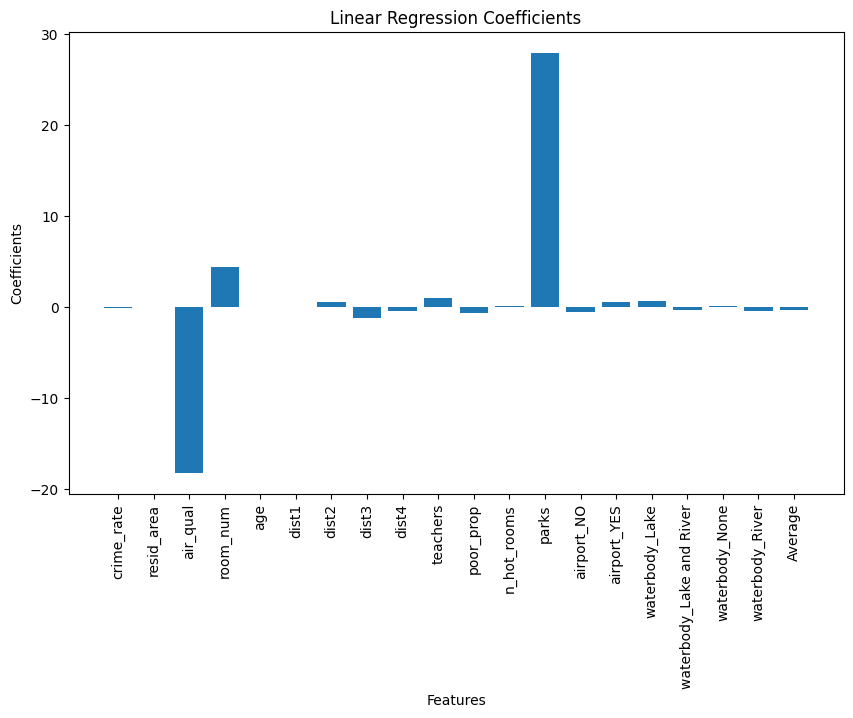

In [47]:
feature_names = x_multi.columns

# Get the coefficients
coefficients = model.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)
plt.show()

**INFERENCE**

1. From the above plot,we could clearly infer that if we increase the value of **parks** the response variable positively increases on a **larger effect**
2. Remaining all predictor variables significantly impact on the **Price** variable.

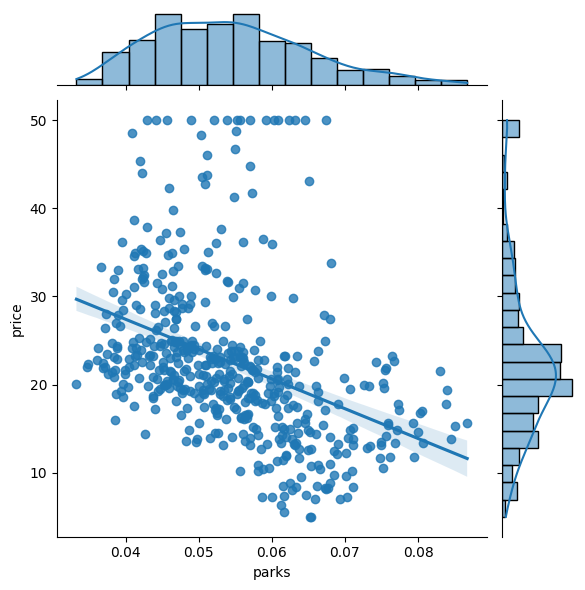

In [48]:
sns.jointplot(x='parks', y='price', data=df, kind='reg')

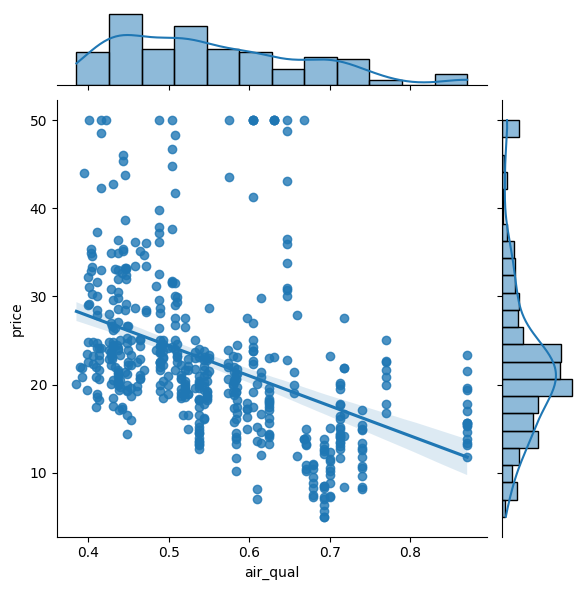

In [49]:
sns.jointplot(x='air_qual', y='price', data=df, kind='reg')

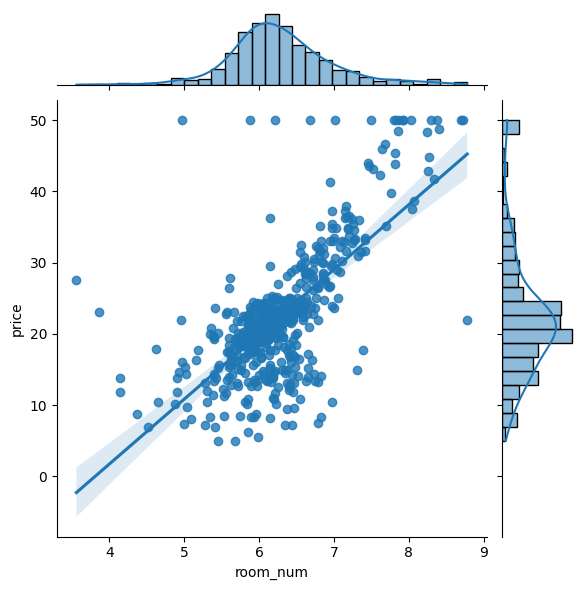

In [50]:
sns.jointplot(x='room_num', y='price', data=df, kind='reg')